In [2]:
!pip install kagglehub

In [3]:
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("nextmillionaire/car-accident-dataset")

print("Path to dataset files:", path)


100%|██████████| 7.06M/7.06M [00:00<00:00, 78.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nextmillionaire/car-accident-dataset/versions/1


In [6]:
import os

# Specify the directory path
path = path

# List files in the directory
files = os.listdir(path)
print("Files in the directory:", files)


Files in the directory: ['Road Accident Data.csv']


In [15]:
import pandas as pd

# Replace 'actual_filename.csv' with the correct file name from Step 1
df = pd.read_csv(f"{path}/Road Accident Data.csv")
print(df.head())


  Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington and Chelsea 

In [16]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [17]:
df.dtypes

,0
Accident_Index,object
Accident Date,object
Day_of_Week,object
Junction_Control,object
Junction_Detail,object
Accident_Severity,object
Latitude,float64
Light_Conditions,object
Local_Authority_(District),object
Carriageway_Hazards,object


In [18]:
# Total number of rows
total_values = len(df["Carriageway_Hazards"])

# Number of missing values
missing_values = df["Carriageway_Hazards"].isnull().sum()

# Proportion of missing values
missing_percentage = (missing_values / total_values) * 100

print(f"Total values in 'Carriageway_Hazards': {total_values}")
print(f"Missing values in 'Carriageway_Hazards': {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")


Total values in 'Carriageway_Hazards': 307973
Missing values in 'Carriageway_Hazards': 302549
Percentage of missing values: 98.24%


In [46]:
# Reduce the dataset to 1/10th of its size
df_reduced = df.sample(frac=0.1, random_state=42)

# Check the size of the reduced dataset
print("Original size:", df.shape[0])
print("Reduced size:", df_reduced.shape[0])


Original size: 307973
Reduced size: 30797


In [47]:
columns_to_drop = [
    "Accident_Index",
    "Accident Date",
    "Local_Authority_(District)",  # Administrative regions
    "Latitude",  # Geospatial data not used in this analysis
    "Longitude",  # Geospatial data not used in this analysis
    "Police_Force",  # Adds no predictive value
    "Carriageway_Hazards",  # Too many missing values
    "Number_of_Casualties",  # Potential data leakage
    "Accident_Severity"
]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)


In [48]:
df_cleaned.head()

,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Thursday,Give way or uncontrolled,T or staggered junction,Daylight,2,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,Monday,Give way or uncontrolled,Crossroads,Daylight,2,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,Sunday,Give way or uncontrolled,T or staggered junction,Daylight,2,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,Monday,Auto traffic signal,T or staggered junction,Daylight,2,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,Tuesday,Auto traffic signal,Crossroads,Darkness - lights lit,2,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [49]:
x = df_cleaned
y = df['Accident_Severity']

In [60]:
y

,Accident_Severity
0,Serious
1,Serious
2,Slight
3,Serious
4,Serious
...,...
307968,Slight
307969,Slight
307970,Slight
307971,Serious


In [50]:
x.columns

Index(['Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Light_Conditions', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [51]:
from sklearn.preprocessing import LabelEncoder

# List of variables to encode
columns_to_encode = [
    'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Light_Conditions',
    'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
    'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
    'Vehicle_Type'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply encoding to each column
for col in columns_to_encode:
    if x[col].dtype == 'object' or x[col].dtype.name == 'category':
        # Apply Label Encoding to categorical columns
        x[col] = label_encoder.fit_transform(x[col])
    else:
        # For numerical or already encoded columns, retain their values
        x[col] = x[col]  # Keep numeric columns as they are



In [52]:
x.head()

,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,4,4,8,4,2,0,1,30,370,1,1,2
1,1,4,0,4,2,4,3,30,118,1,1,13
2,3,4,8,4,2,0,3,30,318,1,1,13
3,1,2,8,4,2,2,3,30,1329,1,3,9
4,5,2,0,1,2,0,3,30,504,1,1,2


In [53]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [55]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)


In [57]:
# Fit the model
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [61]:
# Predict on the test set
y_pred = knn.predict(x_test)


In [62]:
from sklearn.metrics import accuracy_score

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8329734556376329


In [63]:
from sklearn.metrics import classification_report

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

       Fatal       0.03      0.00      0.01       823
       Fetal       0.00      0.00      0.00         8
     Serious       0.20      0.06      0.09      8101
      Slight       0.86      0.97      0.91     52663

    accuracy                           0.83     61595
   macro avg       0.27      0.26      0.25     61595
weighted avg       0.76      0.83      0.79     61595



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[    3     0    58   762]
 [    1     0     0     7]
 [   26     0   448  7627]
 [   68     0  1739 50856]]


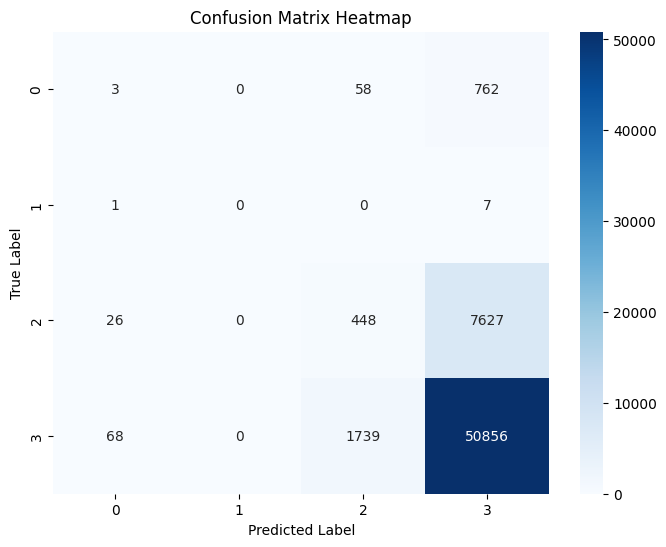

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
